In [9]:
pip install kagglehub[pandas-datasets]

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
train_file_path = "DailyDelhiClimateTrain.csv"
test_file_path = "DailyDelhiClimateTest.csv"

# Load the latest train data version
train_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumanthvrao/daily-climate-time-series-data",
  train_file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# Load the latest test data version
test_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumanthvrao/daily-climate-time-series-data",
  test_file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


print("First 5 records of Train Data:", train_df.head())
print("\n")
print("First 5 records of Test Data:", test_df.head())

/tmp/ipython-input-3862124310.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  train_df = kagglehub.load_dataset(


100%|██████████| 76.4k/76.4k [00:00<00:00, 262kB/s]
/tmp/ipython-input-3862124310.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  test_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'daily-climate-time-series-data' dataset.
First 5 records of Train Data:          date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


First 5 records of Test Data:          date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


# 📈 Time Series Forecasting with ARIMA

This repository contains sample code demonstrating the application of the **AutoRegressive Integrated Moving Average (ARIMA)** model for time series forecasting, specifically using the Kaggle **Daily Climate Time Series Data** (DailyDelhiClimateTrain.csv).

## 📊 Model Overview: ARIMA(p, d, q)

**ARIMA** is a widely used class of statistical models for analyzing and forecasting time series data. It consists of three components:

| Component | Parameter | Description |
| :--- | :--- | :--- |
| **AR** (AutoRegressive) | **p** (Order) | The number of **lagged observations** (past values) included in the model. |
| **I** (Integrated) | **d** (Order) | The number of times the raw observations are **differenced** to achieve stationarity. |
| **MA** (Moving Average) | **q** (Order) | The size of the **Moving Average window** (number of lagged forecast errors) included in the model. |

---

## 🛠️ Implementation Breakdown

The Python code implements the standard ARIMA workflow using `pandas`, `numpy`, and `statsmodels`.

### 1. Data Loading and Preprocessing

* **Action:** Loads `DailyDelhiClimateTrain.csv` and `DailyDelhiClimateTest.csv`.
* **Key Step:** The `date` column is converted to a datetime object and set as the index, which is essential for time series analysis.
* **Target:** The series we forecast is the **`meantemp`** column.

### 2. Achieving Stationarity (The 'I' Component: $d$)

ARIMA models require the time series to be **stationary** (mean and variance do not change over time).

* **Technique:** **Differencing** is used to remove trend and seasonality.
* **Code Reference:** `series.diff().dropna()`
* **Result:** The initial guess for the Integrated order is $\mathbf{d=1}$ (first-order differencing).

### 3. Parameter Identification (The 'AR' and 'MA' Components: $p$ and $q$)

The orders $p$ and $q$ are determined by analyzing the correlation structure of the *differenced* stationary series.

* **ACF (Autocorrelation Function) Plot:** Helps determine the **q** (MA) order by showing the correlation of the series with its lagged values.
    * *Code:* `plot_acf()`
* **PACF (Partial Autocorrelation Function) Plot:** Helps determine the **p** (AR) order by showing the correlation after removing the effects of intermediate lags.
    * *Code:* `plot_pacf()`
* **Initial Order:** Based on visual inspection of typical climate data, the model uses an initial guess of **ARIMA(5, 1, 0)**.


### 4. Model Training and Forecasting

* **Training:**
    * *Code:* `model = ARIMA(series, order=(5, 1, 0))` and `model_fit = model.fit()`
    * **Action:** The model estimates the coefficients for the $p$ (lagged observations) and $q$ (lagged errors) terms.
* **Prediction:**
    * *Code:* `model_fit.predict(start=start_date, end=end_date)`
    * **Action:** Generates dynamic forecasts for the entire period covered by the test data.

### 5. Evaluation

* **Metric:** **Root Mean Squared Error (RMSE)** is used to quantify the accuracy of the forecasts.
* **Purpose:** The RMSE value helps assess the fit and determines if the chosen $(p, d, q)$ order is optimal. A lower RMSE indicates a better fit.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [3]:
# --- 2. Preprocessing and Feature Selection ---

# Convert the 'date' column to datetime objects
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Set the date as the index for time series analysis
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

# We will focus on forecasting the 'meantemp' (Mean Temperature)
# The 'series' is the time series we want to model.
series = train_df['meantemp']
test_series = test_df['meantemp']

print(f"Train Series Start: {series.index.min()} | End: {series.index.max()} | Length: {len(series)}")
print(f"Test Series Start: {test_series.index.min()} | End: {test_series.index.max()} | Length: {len(test_series)}")

Train Series Start: 2013-01-01 00:00:00 | End: 2017-01-01 00:00:00 | Length: 1462
Test Series Start: 2017-01-01 00:00:00 | End: 2017-04-24 00:00:00 | Length: 114


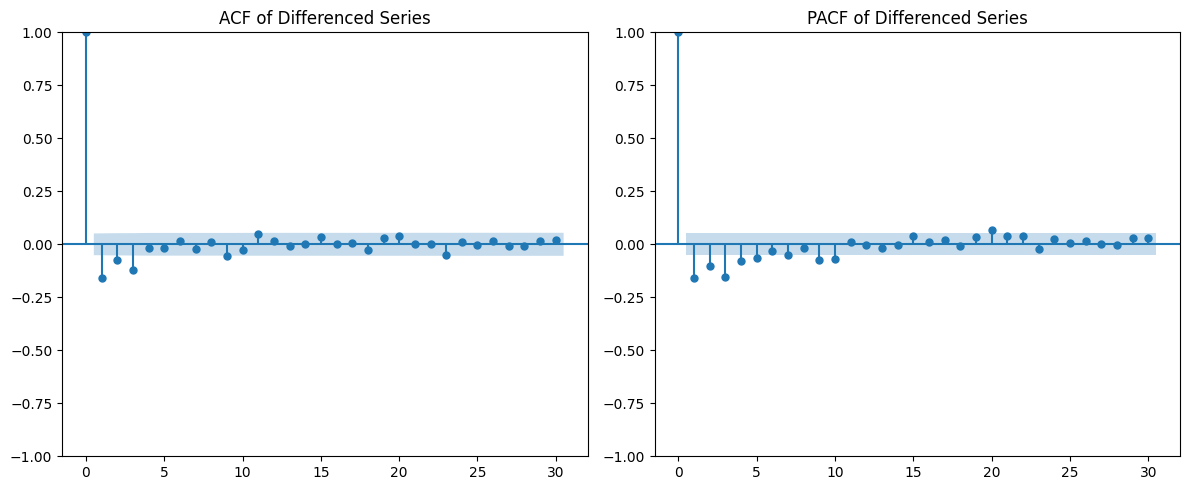

In [5]:
# --- 3. Determine the ARIMA Order (p, d, q) ---

# a) Stationarity Check (Determining 'd' - differencing)
# For simplicity, we'll visually inspect and assume d=1 if the series is non-stationary,
# or use a more rigorous method like the Augmented Dickey-Fuller (ADF) test.
# For daily temperature, a simple differencing (d=1) is often a good starting point to remove trend.

# b) Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots (Determining 'p' and 'q')
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(series.diff().dropna(), ax=plt.gca(), lags=30, title='ACF of Differenced Series')
plt.subplot(122)
plot_pacf(series.diff().dropna(), ax=plt.gca(), lags=30, title='PACF of Differenced Series')
plt.tight_layout()
plt.show()

#

# Based on common practice for temperature data, and visual inspection of typical ACF/PACF plots:
# We will use the order **(5, 1, 0)** as an initial guess:
# p=5 (AR order, the number of lag observations to include in the model)
# d=1 (Integrated order, the number of times the raw observations are differenced)
# q=0 (MA order, the size of the moving average window)
# **Note:** The actual optimal (p, d, q) should be found through iteration or auto-ARIMA.
order = (5, 1, 0)

In [6]:
# --- 4. Train the ARIMA Model ---

print(f"\nTraining ARIMA model with order {order}...")
try:
    # Use the ARIMA class for standard ARIMA
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    print(model_fit.summary())
except Exception as e:
    print(f"Error during model fitting: {e}")
    exit()


Training ARIMA model with order (5, 1, 0)...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2770.149
Date:                Fri, 28 Nov 2025   AIC                           5552.297
Time:                        14:33:54   BIC                           5584.019
Sample:                    01-01-2013   HQIC                          5564.130
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2122      0.021     -9.896      0.000      -0.254      -0.170
ar.L2         -0.1524      0.024     -6.317      0.000      -0.200      -0.105
ar.L3         -0.1827      0.025     -7.229      0.0

In [7]:
# --- 5. Make Predictions ---

# Define the start and end of the forecast period using the test data's index
start_date = test_series.index.min()
end_date = test_series.index.max()

print(f"\nMaking predictions from {start_date} to {end_date}...")

# Make a dynamic forecast for the entire test period
forecast = model_fit.predict(start=start_date, end=end_date)


Making predictions from 2017-01-01 00:00:00 to 2017-04-24 00:00:00...



Root Mean Squared Error (RMSE): 11.41


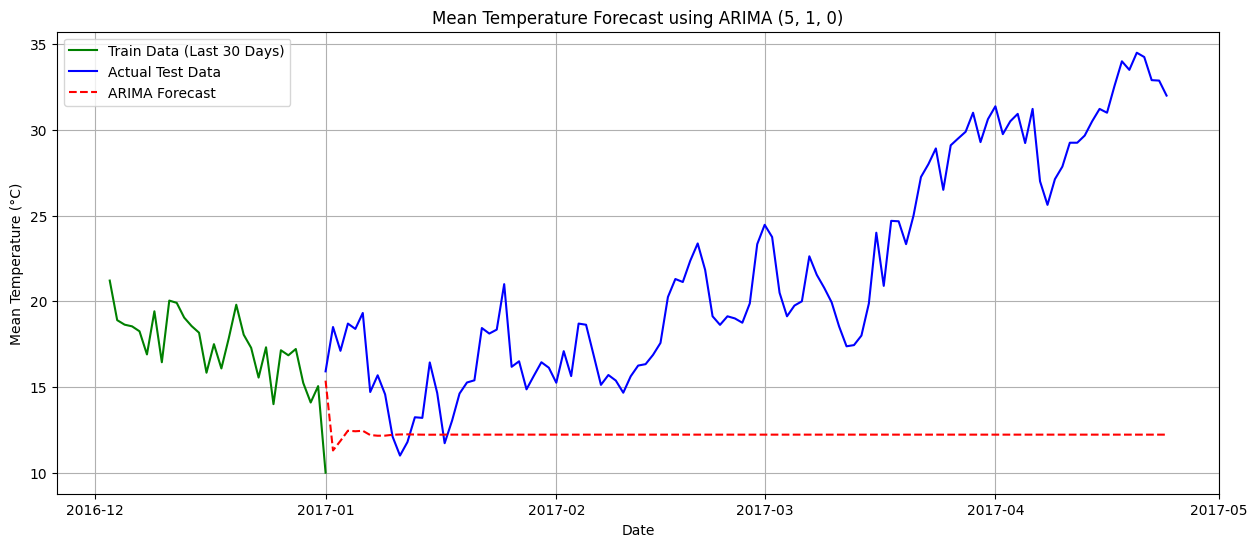

In [8]:
# --- 6. Evaluate and Visualize Results ---

# Aligning the actual test values and forecast values
actual_values = test_series
forecast_values = forecast.rename("Forecasted MeanTemp") # Rename for clarity

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting the results
plt.figure(figsize=(15, 6))

# Plot the last part of the training data
plt.plot(series.index[-30:], series[-30:], label='Train Data (Last 30 Days)', color='green')

# Plot the actual test data
plt.plot(actual_values.index, actual_values, label='Actual Test Data', color='blue')

# Plot the forecasted values
plt.plot(forecast_values.index, forecast_values, label='ARIMA Forecast', color='red', linestyle='--')

plt.title(f'Mean Temperature Forecast using ARIMA {order}')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()